In [1]:
import pandas as pd

In [2]:
%pwd

'C:\\Users\\SUMAN CHATTERJEE\\Documents\\Business analytics in action'

In [3]:
%cd C:\Users\SUMAN CHATTERJEE\Documents\Business analytics in action

C:\Users\SUMAN CHATTERJEE\Documents\Business analytics in action


In [4]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',sep=",")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
import numpy as np

In [13]:
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)

In [14]:
df = df[df["TotalCharges"].notnull()]
df = df.reset_index()[df.columns]

In [15]:
df.isnull().sum().sum()

0

In [16]:
df['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [17]:
df['OnlineBackup'].value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

In [18]:
df['DeviceProtection'].value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

In [19]:
df['TechSupport'].value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

In [20]:
df['StreamingTV'].value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

In [21]:
df['StreamingMovies'].value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

In [22]:
chng= [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in chng : 
    df[i]  = df[i].replace({'No internet service' : 'No'})

In [23]:
df['StreamingMovies'].value_counts()

No     4301
Yes    2731
Name: StreamingMovies, dtype: int64

In [24]:
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes",0:"No"})

### Correlations between customer data features and customer churn

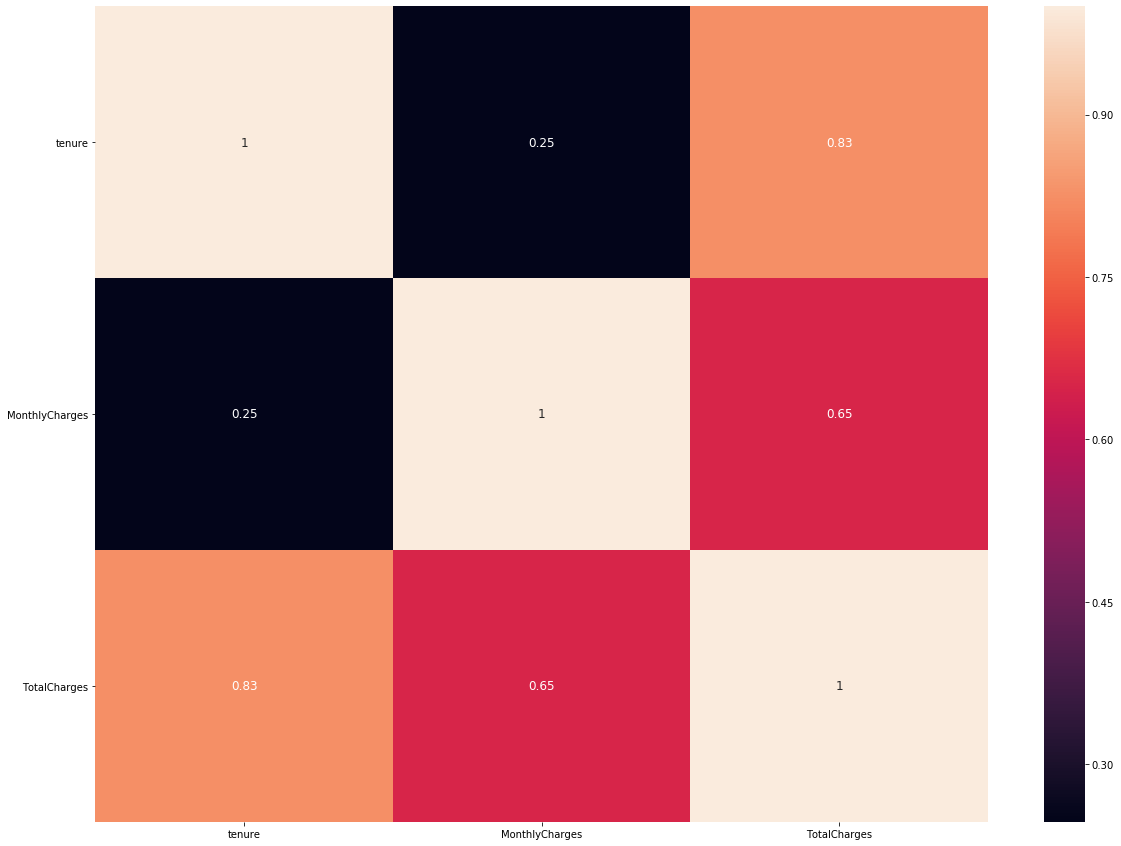

In [25]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### To avoid unstable estimates of coeffiecients in our models, we will drop the ‘TotalCharges’ variable, as it is highly correlated to both ‘Tenure’ and ‘MonthlyCharges’.

In [26]:
df.pop('TotalCharges')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7027    1990.50
7028    7362.90
7029     346.45
7030     306.60
7031    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
labelencoder = LabelEncoder()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null object
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
Churn               7032 non-null object
dtypes: float64(1), int64(1), object(18)
memory usage: 1.1+ MB


In [30]:
df['customerID']=LabelEncoder().fit_transform(df['customerID'])
df['gender']=LabelEncoder().fit_transform(df['gender'])
df['SeniorCitizen']=LabelEncoder().fit_transform(df['SeniorCitizen'])
df['Partner']=LabelEncoder().fit_transform(df['Partner'])
df['Dependents']=LabelEncoder().fit_transform(df['Dependents'])
df['PhoneService']=LabelEncoder().fit_transform(df['PhoneService'])
df['MultipleLines']=LabelEncoder().fit_transform(df['MultipleLines'])
df['InternetService']=LabelEncoder().fit_transform(df['InternetService'])
df['OnlineSecurity']=LabelEncoder().fit_transform(df['OnlineSecurity'])
df['OnlineBackup']=LabelEncoder().fit_transform(df['OnlineBackup'])
df['DeviceProtection']=LabelEncoder().fit_transform(df['DeviceProtection'])
df['TechSupport']=LabelEncoder().fit_transform(df['TechSupport'])
df['StreamingTV']=LabelEncoder().fit_transform(df['StreamingTV'])
df['StreamingMovies']=LabelEncoder().fit_transform(df['StreamingMovies'])
df['Contract']=LabelEncoder().fit_transform(df['Contract'])
df['PaperlessBilling']=LabelEncoder().fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=LabelEncoder().fit_transform(df['PaymentMethod'])
df['Churn']=LabelEncoder().fit_transform(df['Churn'])

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
train, test = train_test_split(df, test_size = 0.25)
 
train_y = train['Churn']
test_y = test['Churn']
 
train_x = train
train_x.pop('Churn')
test_x = test
test_x.pop('Churn')

2325    0
5051    1
1280    0
3270    0
4524    1
       ..
366     0
4872    0
3410    0
3295    0
5205    0
Name: Churn, Length: 1758, dtype: int32

### We will consider several different models to predict customer churn. To ensure we are not over-fitting to our data, we will split the 7,043 customer records into a training and test set, with the test set being 25% of the total records.


### Logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
logisticRegr = LogisticRegression()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
customerID          7032 non-null int32
gender              7032 non-null int32
SeniorCitizen       7032 non-null int32
Partner             7032 non-null int32
Dependents          7032 non-null int32
tenure              7032 non-null int64
PhoneService        7032 non-null int32
MultipleLines       7032 non-null int32
InternetService     7032 non-null int32
OnlineSecurity      7032 non-null int32
OnlineBackup        7032 non-null int32
DeviceProtection    7032 non-null int32
TechSupport         7032 non-null int32
StreamingTV         7032 non-null int32
StreamingMovies     7032 non-null int32
Contract            7032 non-null int32
PaperlessBilling    7032 non-null int32
PaymentMethod       7032 non-null int32
MonthlyCharges      7032 non-null float64
Churn               7032 non-null int32
dtypes: float64(1), int32(18), int64(1)
memory usage: 604.4 KB


In [36]:
df['PaymentMethod'].value_counts()

2    2365
3    1604
0    1542
1    1521
Name: PaymentMethod, dtype: int64

Intercept: [-0.35427489]
Regression: [[-5.69767544e-05 -1.08246612e-01  2.82444046e-01 -1.20355768e-01
  -2.88003965e-01 -3.98195631e-02 -4.16093606e-01  2.99328717e-01
  -2.01480908e-01 -4.09173314e-01 -1.14760511e-01 -1.21781011e-01
  -4.41855751e-01  9.88652643e-02  1.27385500e-01 -8.09959265e-01
   2.96755131e-01 -8.61343689e-02  2.19190677e-02]]
Accuracy of logistic regression classifier on test set: 0.79
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1301
           1       0.62      0.51      0.56       457

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.78      0.79      0.79      1758



C:\Users\SUMAN CHATTERJEE\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Text(0.5, 15.0, 'Predicted label')

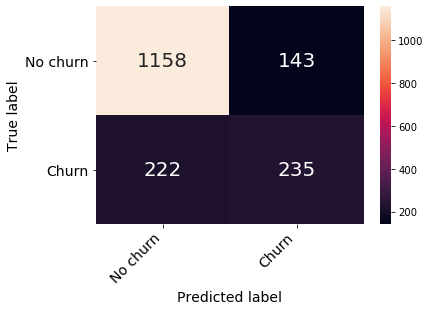

In [37]:
logisticRegr.fit(X=train_x, y=train_y)
test_y_pred = logisticRegr.predict(test_x)
confusion_matrix = confusion_matrix(test_y, test_y_pred)
print('Intercept: ' + str(logisticRegr.intercept_))
print('Regression: ' + str(logisticRegr.coef_))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(test_x, test_y)))
print(classification_report(test_y, test_y_pred))
 
confusion_matrix_df = pd.DataFrame(confusion_matrix, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier()
randomForest.fit(train_x, train_y)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(randomForest.score(test_x, test_y)))

Accuracy of random forest classifier on test set: 0.79


In [39]:
import seaborn as sns

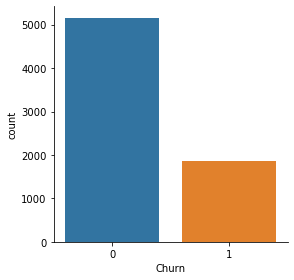

In [40]:
sns.catplot(x="Churn", kind="count", data=df,height=4) # 0 represents No and 1 represents Yes

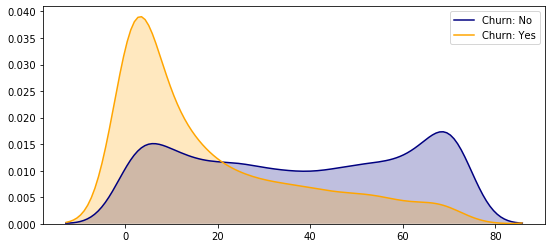

In [41]:
plt.figure(figsize=(9, 4))
sns.kdeplot(df[df['Churn'] == 0]['tenure'], color= 'navy',shade=True, label= 'Churn: No')
sns.kdeplot(df[df['Churn'] == 1]['tenure'], color= 'orange',shade=True, label= 'Churn: Yes')

In [42]:
from sklearn.cluster import KMeans

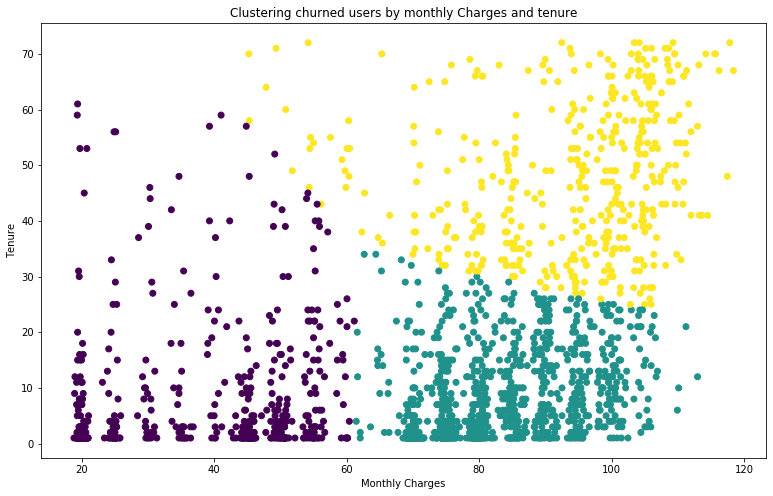

In [44]:
monthly_tenure = df[['MonthlyCharges','tenure']][df.Churn == 1] # considering only the customers who have churned

kmeans = KMeans(n_clusters = 3, random_state = 42).fit(monthly_tenure) # Three clusters

monthly_tenure['cluster'] = kmeans.labels_

plt.subplots(figsize=(13,8))

#plotting in scatter plot
plt.scatter( monthly_tenure['MonthlyCharges'], monthly_tenure['tenure'],
           c = monthly_tenure['cluster'])

plt.title('Clustering churned users by monthly Charges and tenure')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')


plt.show()
